In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [2]:
#read file
file = pd.read_csv("influencers.csv")

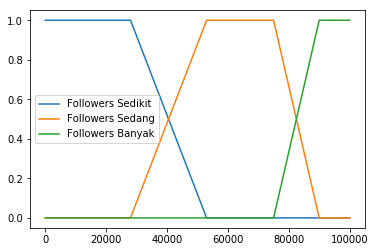

In [3]:
#membership function for followers

f = [0, 28000, 53000, 75000, 90000, 100000]

def folSedikitFunc(x):
    if (x <= f[1]):
        return 1
    elif(x > f[2]):
        return 0
    elif (x > f[1] and x <= f[2]):
        return (f[2]-x)/(f[2]-f[1])
    
def folSedangFunc(x):
    if (x <= f[1] or x > f[4]):
        return 0
    elif (x > f[1] and x <= f[2]):
        return (x-f[1])/(f[2]-f[1])
    elif (x > f[2] and x <= f[3]):
        return 1
    elif (x > f[3] and x <= f[4]):
        return (f[4]-x)/(f[4]-f[3])
    
def folBanyakFunc(x):
    if (x <= f[3]):
        return 0
    elif (x > f[4]):
        return 1
    elif (x > f[3] and x <= f[4]):
        return (x-f[3])/(f[4]-f[3])
    
#plot for membership function    
    
x1 = [0,28000,53000,100000]
y1 = [1,1,0,0]

x2 = [0,28000,53000,75000,90000,100000]
y2 = [0,0,1,1,0,0]

x3 = [0,75000,90000,100000]
y3 = [0,0,1,1]

plt.plot(x1, y1, label='Followers Sedikit')
plt.plot(x2, y2, label='Followers Sedang')
plt.plot(x3, y3, label='Followers Banyak')
plt.legend()

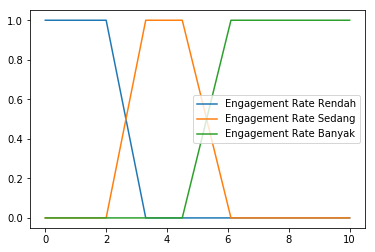

In [4]:
#membership function for engagement rate

e = [0, 2.0, 3.3, 4.5, 6.1, 10.0]

def engRendahFunc(x):
    if (x <= e[1]):
        return 1
    elif(x > e[2]):
        return 0
    elif (x > e[1] and x <= e[2]):
        return (e[2]-x)/(e[2]-e[1])
    
def engSedangFunc(x):
    if (x <= e[1] or x > e[4]):
        return 0
    elif (x > e[1] and x <= e[2]):
        return (x-e[1])/(e[2]-e[1])
    elif (x > e[2] and x <= e[3]):
        return 1
    elif (x > e[3] and x <= e[4]):
        return (e[4]-x)/(e[4]-e[3])
    
def engTinggiFunc(x):
    if (x <= e[3]):
        return 0
    elif (x > e[4]):
        return 1
    elif (x > e[3] and x <= e[4]):
        return (x-e[3])/(e[4]-e[3])
    
#plot for membership function

x1 = [0,2.0,3.3,10.0]
y1 = [1,1,0,0]

x2 = [0,2.0,3.3,4.5,6.1,10.0]
y2 = [0,0,1,1,0,0]

x3 = [0,4.5,6.1,10.0]
y3 = [0,0,1,1]

plt.plot(x1, y1, label='Engagement Rate Rendah')
plt.plot(x2, y2, label='Engagement Rate Sedang')
plt.plot(x3, y3, label='Engagement Rate Banyak')
plt.legend()

In [5]:
label_fol = ['sedikit','sedang','banyak']
label_eng = ['rendah','sedang','tinggi']

In [6]:
def fuzzyRules(labe, labf, fol, eng, id):
    output = []
    if (labf[0] == 'sedikit' and labe[0] == 'rendah'):
        output.append(['no', (fol[id][1] and eng[id][1])])
    if (labf[0] == 'sedikit' and labe[1] == 'sedang'):
        output.append(['no', (fol[id][1] and eng[id][2])])
    if (labf[0] == 'sedikit' and labe[2] == 'tinggi'):
        output.append(['maybe', (fol[id][1] and eng[id][3])])
    if (labf[1] == 'sedang' and labe[0] == 'rendah'):
        output.append(['no', (fol[id][2] and eng[id][1])])
    if (labf[1] == 'sedang' and labe[1] == 'sedang'):
        output.append(['maybe', (fol[id][2] and eng[id][2])])
    if (labf[1] == 'sedang' and labe[2] == 'tinggi'):
        output.append(['yes', (fol[id][2] and eng[id][3])])
    if (labf[2] == 'banyak' and labe[0] == 'rendah'):
        output.append(['maybe', (fol[id][3] and eng[id][1])])
    if (labf[2] == 'banyak' and labe[1] == 'sedang'):
        output.append(['yes', (fol[id][3] and eng[id][2])])
    if (labf[2] == 'banyak' and labe[2] == 'tinggi'):
        output.append(['yes', (fol[id][3] and eng[id][3])])
    return (output)

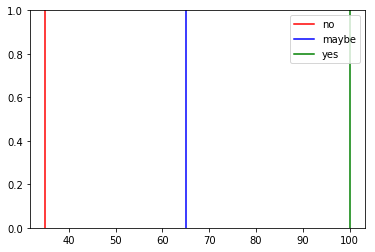

In [7]:
def defuzzification(inf):
    return ((inf[0]*35)+(inf[1]*65)+(inf[2]*100))/(inf[0]+inf[1]+inf[2])

#model sugeno
plt.axvline(x=35, color='red', label='no')
plt.axvline(x=65, color='blue', label='maybe')
plt.axvline(x=100, color = 'green', label='yes')
plt.legend()

In [8]:
#main program for fuzzy logic

val_foll = []
for i in range(len(file)):
    value = []
    value.append(file["id"][i])
    value.append(folSedikitFunc(file["followerCount"][i]))
    value.append(folSedangFunc(file["followerCount"][i]))
    value.append(folBanyakFunc(file["followerCount"][i]))
    val_foll.append(value)
    
val_eng = []
for i in range(len(file)):
    value = []
    value.append(file["id"][i])
    value.append(engRendahFunc(file["engagementRate"][i]))
    value.append(engSedangFunc(file["engagementRate"][i]))
    value.append(engTinggiFunc(file["engagementRate"][i]))
    val_eng.append(value)

inf_val = []
defuz = []
for i in range(len(file)):
    res = fuzzyRules(label_eng, label_fol, val_foll, val_eng, i)
    infer = []
    n = []
    m = []
    y = []
    for o in range(len(res)):
        if (res[o][0] == 'no'):
            n.append(res[o][1])
        if (res[o][0] == 'maybe'):
            m.append(res[o][1])
        if (res[o][0] == 'yes'):
            y.append(res[o][1])
    infer.append(n[0] or n[1] or n[2])
    infer.append(m[0] or m[1] or m[2])
    infer.append(y[0] or y[1] or y[2])
    
    defuz.append([defuzzification(infer),i+1])
    
defuz.sort(reverse=True)
chosen = []
for i in range(20):
    chosen.append(defuz[i][1])

In [9]:
def cekAkurasi(d):
    right = [11,13,59,60,41,75,72,19,61,2,25,53,93,74,48,76,67,100,36,39]
    k = 0
    defuzzi = []
    for i in range(20):
        defuzzi.append(defuz[i][1])
        if(defuz[i][1] in right):
            k = k + 1
    return (k/20)*100

cekAkurasi(defuz)


100.0

In [10]:
#write result of fuzzy logic to chosen.csv
with open('chosen.csv', mode='w') as influencer_file:
    influencer_writer = csv.writer(influencer_file, delimiter='\n', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    influencer_writer.writerow(chosen)